# Connecting Google Drive to Github 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier

/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier


## Git commands
If you want to change some structure or code of this archive and commit to the main repository please request the author of code. 

git status 


git commit -m "message" 

In [137]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   Frontiers_analysis.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	812A_2019_FEV_2KM.csv
	812A_2019_JAN_2KM.csv
	812A_2019_MAR_2KM.csv

no changes added to commit (use "git add" and/or "git commit -a")


In [138]:
git add .



# Floods map
This data will be analyzed through a 2000 meters of spatial radius, starting from the 812A, 833A and 857A pluviometers. 

We going to explore the first trimester data of 2019, including rain gauges, radar and Twitter data. 

In [4]:
import pandas as pd 
import folium 
import numpy as np

In [5]:
floods=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/Alagamentos_2019.csv')

In [6]:
floods_points = floods[["LAT", "LONG"]]
floods_list=floods_points.values.tolist()

In [7]:
from folium.plugins import MarkerCluster
MarkerCluster()

In [8]:
floods.head()

,SEQ,LONG,LAT,LOCAL_ED,LOCALIZACA,REFERENCIA,DATA,MES,H_INICIO,H_FIM,...,latitude,longitude,nome,id_municip,rede,tipoestaca,geocodigo,cidade,xcoord,ycoord
0,7.0,-46.638806,-23.549408,PC DA BANDEIRA,PC DA BANDEIRA,AV VINTE E TRES DE MAIO-CENTROBAIRRO-SE,2019/01/01,1.0,18:34:00,19:23:00,...,-23.543311,-46.635987,AC Central de SP,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.635987,-23.543311
1,13.0,-46.638580,-23.548910,PC DA BANDEIRA,PC DA BANDEIRA,ALTURA DO NUMERO 27-CENTROBAIRRO-SE,2019/01/03,1.0,17:27:00,17:42:00,...,-23.543311,-46.635987,AC Central de SP,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.635987,-23.543311
2,14.0,-46.638240,-23.550330,AV VINTE E TRES DE MAIO,AV VINTE E TRES DE MAIO LIBERDADE,PC DA BANDEIRA-SANTANAAEROPORTO-SE,2019/01/03,1.0,19:43:00,20:18:00,...,-23.543311,-46.635987,AC Central de SP,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.635987,-23.543311
3,15.0,-46.634830,-23.542110,TUN PAPA JOAO PAULO II,TN PAPA JOAO PAULO II REPUBLICA,AV PRESTES MAIA-SANTANAAEROPORTO-SE,2019/01/03,1.0,19:52:00,20:04:00,...,-23.543311,-46.635987,AC Central de SP,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.635987,-23.543311
4,22.0,-46.629470,-23.540356,R DA CANTAREIRA,R DA CANTAREIRA,AV MERCURIO-BAIRROCENTRO-SE,2019/01/04,1.0,14:45:00,15:03:00,...,-23.543311,-46.635987,AC Central de SP,2692,CEMADEN,Pluviométrica,3550308,SÃO PAULO,-46.635987,-23.543311


## Markers and Rain Gauges

In [9]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 29.6 MB/s 
     |████████████████████████████████| 16.7 MB 491 kB/s 
     |████████████████████████████████| 6.3 MB 44.9 MB/s 


In [10]:
import geopandas
tamanduatei=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ALAG.zip')
all_floods=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/all_floods_2019.csv')

In [11]:
all_floods_coord=all_floods[['LAT', 'LONG']]
all_floods_list=all_floods_coord.values.tolist()

In [12]:
#https://fontawesome.com/v4/icons/
map = folium.Map(location=[-23.543311,-46.635987], zoom_start=12)
for point in range(0, len(all_floods_list)):
    folium.Marker(all_floods_list[point], all_floods['DATA'][point], icon=folium.Icon(color='black', icon='check-square', prefix='fa')).add_to(map)
folium.GeoJson(data=tamanduatei["geometry"]).add_to(map)
map

## Clusterization map 

In [13]:
map2 = folium.Map(location=[-23.543311,-46.635987], tiles='CartoDB dark_matter', zoom_start=15)

marker_cluster =MarkerCluster().add_to(map2)

for point in range(0, len(all_floods_list)):
    folium.Marker(all_floods_list[point], popup=all_floods['REFERENCIA'][point]).add_to(marker_cluster)
map2

# Flood data processing  OUTPUT: df_trimester
Temporal cut : january to march (2019)

Adjusting to 812A, 833A and 857A rain gauges

The floods in this data correspond to the spatial radius of 2000 meters of the respective rain gauge. 

## Importing archives and listing the dataframes 

In [14]:
floods812=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/812A_alags.csv')
floods833=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/833A_alags.csv')
floods857=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/857A_alags.csv')

In [15]:
len(floods812),len(floods833),len(floods857)

(158, 164, 162)

In [16]:
df_list_flood=[floods812, floods833, floods857]

## Temporal cut OUTPUT: df_trimester 

df_trimester is a list of dataframes containing the floods in three different rain gauges

In [17]:
#changing the data format and filtering to the analyzed temporal window (trimester of 2019)
#df_trimester is a new list for the temporal window (list of dataframe)
df_trimester=list()
months=[1.0,2.0,3.0]
for k in df_list_flood:
  k['DATA']=pd.to_datetime(k['DATA']).dt.strftime('%Y-%m-%d')
  aux=k[k.MES.isin(months)]
  df_trimester.append(aux)

# Twitter data processing OUTPUT: temporal_series

This section contains the processing of 833A and 857A geolocated tweets 

## Importing data

In [69]:
tweet_833=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/833A_tweet_2019.csv')
tweet_857=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/tweets_857A.csv')
d1=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/812A_2019_JAN_2KM.csv')
d2=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/812A_2019_FEV_2KM.csv')
d3=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Frontiers/Frontier/812A_2019_MAR_2KM.csv')


In [70]:
tweet_812=pd.concat([d1,d2,d3],ignore_index=True)


In [71]:
tweet_833.drop(columns=['id', 'username','retweets', 'favorites', 'permalink',
       'mentions', 'hashtags', 'geo', 'emojis', 'lang', 'verified',
       'replyCount', 'quoteCount', 'source', 'outlinks'], axis=1, inplace=True)

In [72]:
tweet_812.drop(columns=['id', 'username','retweets', 'favorites', 'permalink',
       'mentions', 'hashtags', 'geo', 'emojis', 'lang', 'verified',
       'replyCount', 'quoteCount', 'source', 'outlinks'], axis=1, inplace=True)

In [73]:
tweet_857.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

## Adjusting UTC to SP 

In [74]:
#listing the dataframes 
tweet_list=[tweet_812, tweet_833, tweet_857]

In [75]:
tweet_list[0].columns

Index(['date', 'text'], dtype='object')

In [77]:
import datetime
#this algorithm coverts UTC to America/São Paulo datetime and divide the time with the date 
def UTC_SP(x):
  x['date']=pd.to_datetime(x.date)
  x.date= x.date.dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo')
  x['Time'] = x['date'].dt.strftime('%H:%M')
  x['Date']=x['date'].dt.strftime('%Y-%m-%d')
  return x

In [78]:
tweet_list_trimester=[]
for k in tweet_list:
  aux=UTC_SP(k)
  tweet_list_trimester.append(aux)

In [81]:
tweet_list_trimester[1].head(3)

,date,text,Time,Date
0,2019-01-01 21:57:13-02:00,padrealessandrocampos #somostodospadrealessand...,21:57,2019-01-01
1,2019-01-01 21:54:32-02:00,Começando o ano com a melhor pessoa ao meu lad...,21:54,2019-01-01
2,2019-01-01 21:53:55-02:00,Acabou de publicar uma foto em Canzuá https://...,21:53,2019-01-01


## Filtering tweets with a list of words 

* The filtering process consists of using keywords to select Twitter's posts. 

* When a determine word is found in message, the tweet will be selected.

In [82]:
keywords=['chuva', 'chove', 'chuvoso', 'chuvosa', 'chuvarada']

In [83]:
def filter_twitter(post):
  return post[post.text.str.contains('\W|\W'.join(keywords), case=False,regex=True)]

In [84]:
tw_filter_list=[]
for k in tweet_list_trimester:
  aux=filter_twitter(k)
  tw_filter_list.append(aux)

In [93]:
tw_filter_list[1]

,date,text,Time,Date
117,2019-01-01 19:33:49-02:00,35’ de natação antes da chuva... \n.\n.\n\n.\n...,19:33,2019-01-01
250,2019-01-01 16:58:21-02:00,'O que dizer da chuva... já que todas às palav...,16:58,2019-01-01
1718,2019-01-02 08:52:17-02:00,'E o que dizer da chuva se já faltam palavras...,08:52,2019-01-02
1971,2019-01-03 21:20:29-02:00,Feliz e meiga após tomar chuva https://t.co/RG...,21:20,2019-01-03
1975,2019-01-03 21:14:54-02:00,Venci a chuva e a preguiça!\n\n#vem2019 #acade...,21:14,2019-01-03
...,...,...,...,...
85220,2019-03-28 18:32:13-03:00,Eu vejo surgir teus poetas de campos espaços ...,18:32,2019-03-28
85453,2019-03-28 14:01:29-03:00,#tbt chuva de raio laser #clubculture em São ...,14:01,2019-03-28
85491,2019-03-28 13:05:15-03:00,São Paulo às 9h e 18h.\nDica: Guarda-chuva e c...,13:05,2019-03-28
88385,2019-03-31 16:03:43-03:00,Uma vez me disseram que dançar na chuva é libe...,16:03,2019-03-31


## Temporal Word Series

In [85]:
# generating a date series (temporal series frequency of words in tweets)
import datetime

dt = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 4, 1)
step = datetime.timedelta(days=1)
date_series = []
while dt < end:
    date_series.append(dt.strftime('%Y-%m-%d'))
    dt += step

In [86]:
np.array(date_series)[1]==np.array(tw_filter_list[0].Date.unique())[1]

False

In [100]:
temporal_series=pd.DataFrame(np.array(date_series).tolist(), columns=['data'])
temporal_series

,data
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
85,2019-03-27
86,2019-03-28
87,2019-03-29
88,2019-03-30


In [101]:
import re
counter=0
temporal_series_dict={'words_fr_812a':[], 'words_fr_833a':[], 'words_fr_857a':[]}
pos=0
for key in list(temporal_series_dict.keys()):
  for x in np.array(date_series):
    variable=tw_filter_list[pos][tw_filter_list[pos].Date==x]
    for v in range(0, len(variable.text)): 
      for p in keywords:
        if (re.search(p, variable.iloc[v,1], re.IGNORECASE)!=None):
          counter+=1
    temporal_series_dict[key].append(counter)
    counter=0
  pos+=1


In [102]:
for var in list(temporal_series_dict.keys()):
  temporal_series[var]=temporal_series_dict[var]

In [103]:
temporal_series.head(5)

,data,words_fr_812a,words_fr_833a,words_fr_857a
0,2019-01-01,0,2,3
1,2019-01-02,0,1,1
2,2019-01-03,3,5,2
3,2019-01-04,0,5,4
4,2019-01-05,1,11,8


## Tweet Frequence 


In [104]:
for value in range(0, len(tw_filter_list)):
  temporal_series=temporal_series.merge(tw_filter_list[value].Date.value_counts().to_frame(), how='left',
                      left_on='data', right_on=tw_filter_list[value].Date.value_counts().to_frame().index )
  


In [105]:
temporal_series

,data,words_fr_812a,words_fr_833a,words_fr_857a,Date_x,Date_y,Date
0,2019-01-01,0,2,3,NaN,2.0,3.0
1,2019-01-02,0,1,1,NaN,1.0,1.0
2,2019-01-03,3,5,2,3.0,5.0,2.0
3,2019-01-04,0,5,4,NaN,5.0,4.0
4,2019-01-05,1,11,8,1.0,11.0,8.0
...,...,...,...,...,...,...,...
85,2019-03-27,0,0,0,NaN,NaN,NaN
86,2019-03-28,0,3,3,NaN,3.0,3.0
87,2019-03-29,0,0,0,NaN,NaN,NaN
88,2019-03-30,0,0,0,NaN,NaN,NaN


In [106]:
temporal_series.rename(columns={'Date_x':'tw_812', 'Date_y':'tw_833', 'Date': 'tw_857'}, inplace=True)

In [107]:
temporal_series

,data,words_fr_812a,words_fr_833a,words_fr_857a,tw_812,tw_833,tw_857
0,2019-01-01,0,2,3,NaN,2.0,3.0
1,2019-01-02,0,1,1,NaN,1.0,1.0
2,2019-01-03,3,5,2,3.0,5.0,2.0
3,2019-01-04,0,5,4,NaN,5.0,4.0
4,2019-01-05,1,11,8,1.0,11.0,8.0
...,...,...,...,...,...,...,...
85,2019-03-27,0,0,0,NaN,NaN,NaN
86,2019-03-28,0,3,3,NaN,3.0,3.0
87,2019-03-29,0,0,0,NaN,NaN,NaN
88,2019-03-30,0,0,0,NaN,NaN,NaN


# Integration of Twitter processed data with floods

In [117]:
for value in range(0, len(df_trimester)):
  temporal_series=temporal_series.merge(df_trimester[value].DATA.value_counts(), how='left', left_on='data',
                      right_on=df_trimester[value].DATA.value_counts().to_frame().index)

In [122]:
temporal_series.rename(columns={'DATA_x': 'floods_812', 'DATA_y': 'floods_833', 'DATA': 'floods_857'}, inplace=True)

In [123]:
temporal_series

,data,words_fr_812a,words_fr_833a,words_fr_857a,tw_812,tw_833,tw_857,floods_812,floods_833,floods_857
0,2019-01-01,0,2,3,0.0,2.0,3.0,0.0,1.0,1.0
1,2019-01-02,0,1,1,0.0,1.0,1.0,0.0,0.0,0.0
2,2019-01-03,3,5,2,3.0,5.0,2.0,1.0,3.0,3.0
3,2019-01-04,0,5,4,0.0,5.0,4.0,4.0,4.0,4.0
4,2019-01-05,1,11,8,1.0,11.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
85,2019-03-27,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
86,2019-03-28,0,3,3,0.0,3.0,3.0,1.0,1.0,0.0
87,2019-03-29,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
88,2019-03-30,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Documentation for the temporal_series dataframe 

If you don't know what is the value in a column call the following command: 

documentation_temporal_serie['insert column here'].

In [111]:
documentation_temporal_series={'Documentation': 'This variable explains each variable', 'data':'Temporal window of analysis',
 'words_fr_833a': 'Words frequence in 833A rain gauge', 'words_fr_857a': 'Words frequence in 857A rain gauge', 
 'floods_833': 'Floods frequence in 833A rain gauge', 'floods_857': 'Words Frequence in 857A rain gauge'}

In [120]:
temporal_series.fillna(0)

,data,words_fr_812a,words_fr_833a,words_fr_857a,tw_812,tw_833,tw_857,floods_812,floods_833,DATA
0,2019-01-01,0,2,3,0.0,2.0,3.0,0.0,1.0,1.0
1,2019-01-02,0,1,1,0.0,1.0,1.0,0.0,0.0,0.0
2,2019-01-03,3,5,2,3.0,5.0,2.0,1.0,3.0,3.0
3,2019-01-04,0,5,4,0.0,5.0,4.0,4.0,4.0,4.0
4,2019-01-05,1,11,8,1.0,11.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
85,2019-03-27,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
86,2019-03-28,0,3,3,0.0,3.0,3.0,1.0,1.0,0.0
87,2019-03-29,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
88,2019-03-30,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
temporal_series=temporal_series.fillna(0)

In [125]:
temporal_series

,data,words_fr_812a,words_fr_833a,words_fr_857a,tw_812,tw_833,tw_857,floods_812,floods_833,floods_857
0,2019-01-01,0,2,3,0.0,2.0,3.0,0.0,1.0,1.0
1,2019-01-02,0,1,1,0.0,1.0,1.0,0.0,0.0,0.0
2,2019-01-03,3,5,2,3.0,5.0,2.0,1.0,3.0,3.0
3,2019-01-04,0,5,4,0.0,5.0,4.0,4.0,4.0,4.0
4,2019-01-05,1,11,8,1.0,11.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
85,2019-03-27,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
86,2019-03-28,0,3,3,0.0,3.0,3.0,1.0,1.0,0.0
87,2019-03-29,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
88,2019-03-30,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Boxplot generation

## Boxplot for 833A rain gauge


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


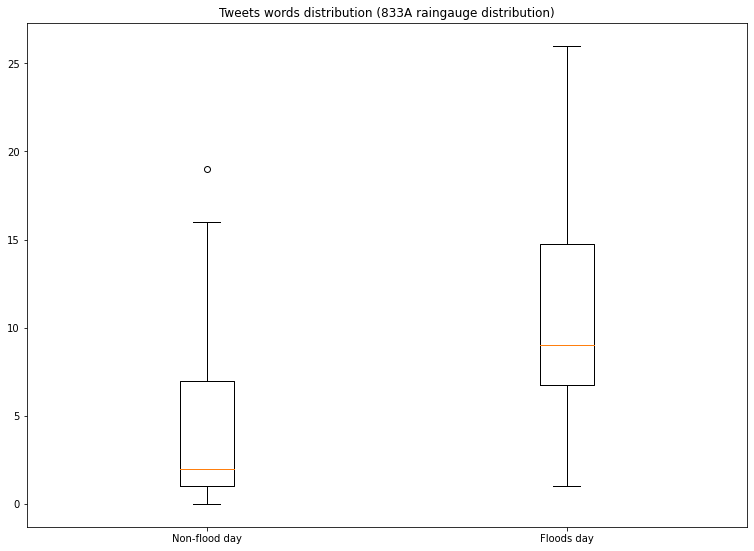

In [126]:
import matplotlib.pyplot as plt 
import numpy as np 
   
data = [temporal_series[temporal_series.floods_833==0]['words_fr_833a'], temporal_series[temporal_series.floods_833!=0]['words_fr_833a']] 
   
fig = plt.figure(figsize =(10, 7)) 
   
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xticklabels(['Non-flood day', 'Floods day'])
ax.set_title('Tweets words distribution (833A raingauge distribution)')
# Creating plot 
bp = ax.boxplot(data) 
   
# show plot 
plt.show() 

## Boxplot for 857A rain gauge

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


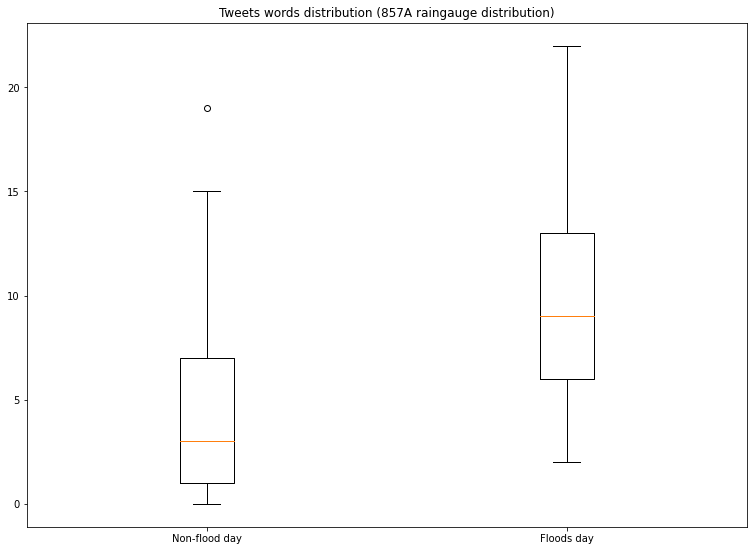

In [129]:
import matplotlib.pyplot as plt 
import numpy as np 
   
data = [temporal_series[temporal_series.floods_857==0]['words_fr_857a'], temporal_series[temporal_series.floods_857!=0]['words_fr_857a']] 
   
fig = plt.figure(figsize =(10, 7)) 
   
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xticklabels(['Non-flood day', 'Floods day'])
ax.set_title('Tweets words distribution (857A raingauge distribution)')
# Creating plot 
bp = ax.boxplot(data) 
   
# show plot 
plt.show() 

## Boxplot for 812A rain gauge

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


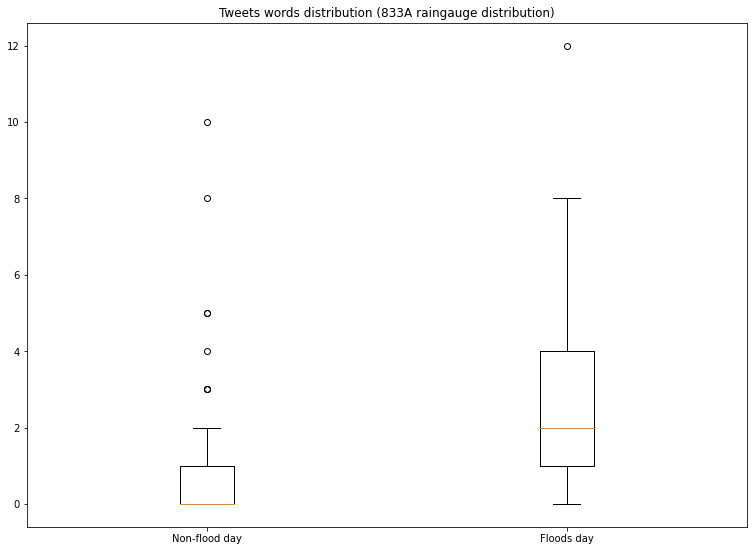

In [130]:
import matplotlib.pyplot as plt 
import numpy as np 
   
data = [temporal_series[temporal_series.floods_812==0]['words_fr_812a'], temporal_series[temporal_series.floods_812!=0]['words_fr_812a']]
   
fig = plt.figure(figsize =(10, 7)) 
   
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xticklabels(['Non-flood day', 'Floods day'])
ax.set_title('Tweets words distribution (833A raingauge distribution)')
# Creating plot 
bp = ax.boxplot(data) 
   
# show plot 
plt.show() 

## All plots in once

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


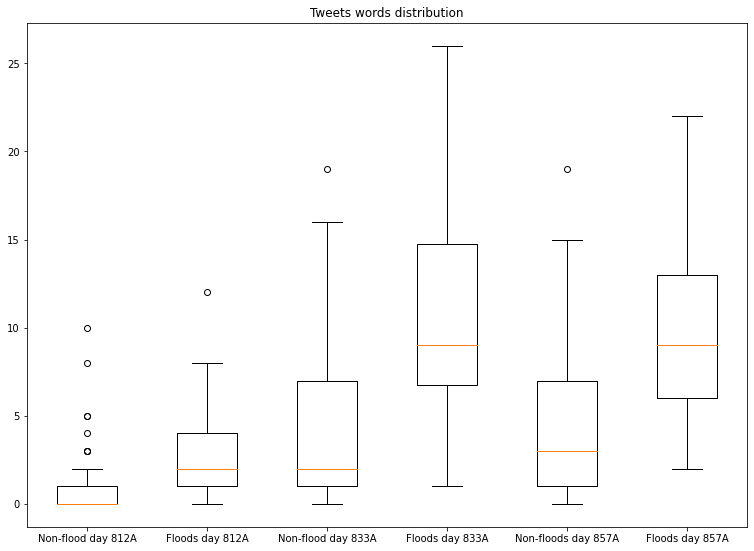

In [136]:
import matplotlib.pyplot as plt 
import numpy as np 
   
data =  [temporal_series[temporal_series.floods_812==0]['words_fr_812a'], temporal_series[temporal_series.floods_812!=0]['words_fr_812a'],
        temporal_series[temporal_series.floods_833==0]['words_fr_833a'], temporal_series[temporal_series.floods_833!=0]['words_fr_833a'],
        temporal_series[temporal_series.floods_857==0]['words_fr_857a'], temporal_series[temporal_series.floods_857!=0]['words_fr_857a']] 
   
fig = plt.figure(figsize =(10, 7)) 
   
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xticklabels(['Non-flood day 812A', 'Floods day 812A', 'Non-flood day 833A', 'Floods day 833A',
                    'Non-floods day 857A', 'Floods day 857A'])
ax.set_title('Tweets words distribution')
# Creating plot 
bp = ax.boxplot(data) 
   
# show plot 
plt.show() 